# Final Project Data Preprocessing - Intro to Machine Learning
CS-UY 4563 <br>
Spring 2021 <br>
Lujie Zhao, Sicong Liu <br>
April 28, 2021 <br>

This project is to predict whether the job candidate will be willing to work for the
company after training, or they plan to go to another company. The Github Repo can be found [here](https://github.com/LujieZ/cs4563-machine-learning).

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

## Data Visualization for Distribution after applying SMOTE

In [102]:
df = pd.read_csv('data_drop_null.csv')
df1 = df.to_numpy()
X = df1[:,:-1]
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)
Y = df1[:,-1:].reshape(X.shape[0],)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
smote = SMOTE()
X_smote, Y_smote = smote.fit_resample(X_train,Y_train)
X_train, Y_train = X_smote, Y_smote

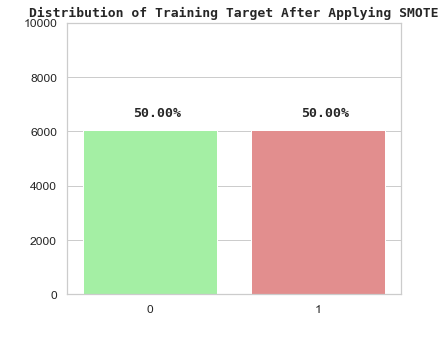

In [103]:
# Visualization of data in different classes.
palette1 = ["palegreen","lightcoral"]
ones = np.count_nonzero(Y_train)
zeros = Y_train.shape[0]-ones
ax = sns.barplot(x=[0,1],y=[zeros, ones], palette=palette1)
sns.set(font_scale=1.1)
sns.set_style("whitegrid")
ax.set_xlabel(" ")
ax.set_ylabel(" ")
fig = plt.gcf()
fig.set_size_inches(6,5)
ax.set_ylim(top=10000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/Y_train.shape[0]), (p.get_x()+ 0.3, p.get_height()+500), fontweight="bold", fontfamily="monospace")
plt.title("Distribution of Training Target After Applying SMOTE", fontsize=13, fontweight="bold", fontfamily="monospace")
plt.show()

## Data Visualization for Different Processing Choice

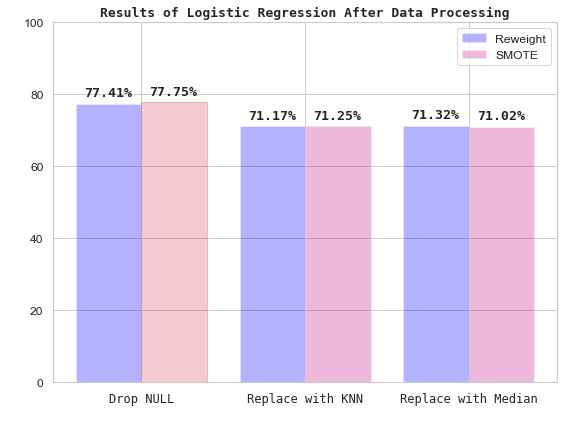

In [104]:
index = ["Drop NULL","Replace with KNN","Replace with Median"]
results = [[77.41, 71.17, 71.32],[77.75, 71.25, 71.02]]
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = np.arange(len(results[0]))
rect1 = ax.bar(x, results[0],width = 0.40,color="blue",alpha=0.3)
rect2 = ax.bar(x+0.40, results[1],width = 0.40,color="mediumvioletred",alpha=0.3)
sns.set(font_scale=1.1,font="monospace")
sns.set_style("whitegrid")
ax.set_xlabel(" ")
ax.set_ylabel(" ")
ax.set_xticks(x+0.20)
ax.set_xticklabels(index, fontfamily="monospace")
ax.legend((rect1[0], rect2[0]),("Reweight","SMOTE"))

rect2[0].set_color("#DB4D6D")
fig = plt.gcf()
fig.set_size_inches(7,5)
ax.set_ylim(top=100)
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()), (p.get_x()+0.05, p.get_height()+2), fontweight="bold", fontfamily="monospace")
plt.title("Results of Logistic Regression After Data Processing", fontsize=13, fontweight="bold", fontfamily="monospace")
plt.show()

## Data Visualization for Data Correlation

In [108]:
corr=df.corr()["target"]
corr[np.argsort(corr, axis=0)[:-1]]

city_development_index   -0.410425
experience               -0.186234
last_new_job             -0.070284
relevent_experience      -0.037675
training_hours           -0.011590
education_level          -0.007383
gender                   -0.002999
company_size              0.000548
company_type              0.003937
enrolled_university       0.040695
major_discipline          0.056043
city                      0.089318
Name: target, dtype: float64